In [1]:
pip install scikit-learn==1.2.2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import __version__

print(__version__)


1.2.2


In [3]:
#load dataset

df = pd.read_csv(r"D:\Data Science internship 2023\lp\laptop_prediction\resources\laptop_details.csv")

In [4]:
#check the dataset

df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [5]:
#check end data
df.tail()

,Product,Rating,MRP,Feature
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...
719,Lenovo Ideapad Slim 3i Core i5 10th Gen - (8 G...,4.2,"₹50,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [6]:
#shape of data
df.shape

(720, 4)

In [7]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [8]:
#checking null values
df.isnull().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

In [9]:
#Extracting Brand name
import re

re_brand = (r"^[A-Za-z]+")
df["Brand"] = df["Product"].apply(lambda each_product :re.search(re_brand, each_product).group())

In [10]:
#extracting MRP rate in int format
amt = "₹36,990"

In [11]:
df["MRP"] = df["MRP"].apply(lambda amt : re.sub(r"[^0-9.]", "",amt))

In [12]:
df

,Product,Rating,MRP,Feature,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS
...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,Lenovo
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,ASUS
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,ASUS


In [13]:
#Extracting features


In [14]:
re_win = (r"Linux|Mac|Windows\s\d+")

df["OS"] = df["Feature"].apply(lambda each_feature : re.search(re_win, each_feature).group() if re.search(re_win, each_feature) != None else np.NaN)

In [15]:
df["OS"].value_counts()

Windows 11    564
Windows 10    126
Mac            19
Name: OS, dtype: int64

In [16]:
re_pc=(r".*Processor")

df["Processor"] = df["Feature"].apply(lambda each_feature : re.search(re_pc, each_feature).group() if re.search(re_pc, each_feature) != None else np.NaN)

In [17]:
re_display = r"\d\d.\d\d\scm"

df["Display"] = df["Feature"].apply(lambda each_feature : re.search(re_display, each_feature).group() if re.search(re_display, each_feature) != None else np.NaN)

In [18]:
re_ram = r"\d{1,2}\sGB"
df["RAM"] = df["Feature"].apply(lambda each_feature : re.search(re_ram,each_feature).group() if re.search(re_ram,each_feature)!= None else np.NaN)

In [19]:
re_rt = (r"DDR[1-9]")

df["RAM_Type"] = df["Feature"].apply(lambda x : re.search(re_rt, x).group() if re.search(re_rt, x) != None else np.NaN)

In [20]:
 re_bit = (r"\d{1,2}\sbit")

df["Bit"] = df["Feature"].apply(lambda x : re.search(re_bit, x).group() if re.search(re_bit, x) != None else np.NaN)

In [21]:
re_ssd = (r"(?:\d{2,})?\d\s(?:GB|TB)\s(?:SSD|HDD)")

df["SSD"] = df["Feature"].apply(lambda x : re.search(re_ssd, x).group() if re.search(re_ssd, x) != None else np.NaN)



In [22]:
df

,Product,Rating,MRP,Feature,Brand,OS,Processor,Display,RAM,RAM_Type,Bit,SSD
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11,Intel Core i3 Processor,35.56 cm,8 GB,DDR4,64 bit,256 GB SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11,Intel Core i3 Processor,39.62 cm,8 GB,DDR4,64 bit,512 GB SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11,Intel Core i3 Processor,39.62 cm,8 GB,DDR4,64 bit,512 GB SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows 10,AMD Ryzen 5 Hexa Core Processor,39.62 cm,8 GB,DDR4,64 bit,512 GB SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11,Intel Core i5 Processor,39.62 cm,8 GB,DDR4,NaN,512 GB SSD
...,...,...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,NaN,Intel Celeron Dual Core Processor,29.46 cm,4 GB,DDR4,NaN,NaN
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,Lenovo,Windows 11,AMD Ryzen 7 Octa Core Processor,39.62 cm,8 GB,DDR4,64 bit,512 GB SSD
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,ASUS,Windows 11,AMD Ryzen 9 Octa Core Processor,39.62 cm,16 GB,DDR5,64 bit,1 TB SSD
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,ASUS,Windows 11,Intel Core i7 Processor,35.56 cm,16 GB,DDR5,64 bit,512 GB SSD


In [23]:
#dropping unwanted columns
df.drop("Feature", axis=1, inplace=True)

In [24]:
df.drop("Product", axis=1, inplace = True)

In [25]:
df.drop("Rating", axis =1, inplace=True)

In [26]:
df.drop("Brand", axis=1, inplace=True)

In [27]:
df["Processors"]  = df["Processor"].apply(lambda x:" ".join(x.split()[0:3]))

In [28]:
def fetch_processors(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [29]:
df["Processor"] = df["Processors"].apply(fetch_processors)

In [30]:
#dropped processors column
df.drop("Processors", axis=1, inplace=True)

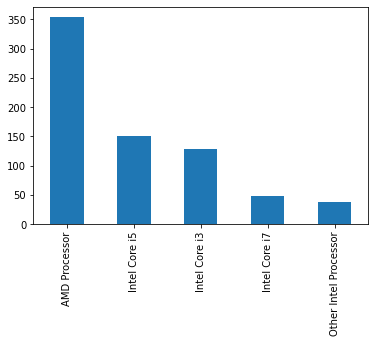

In [31]:
#plotting bar graph for unique value count in feature column
df["Processor"].value_counts().plot(kind='bar')
plt.show()

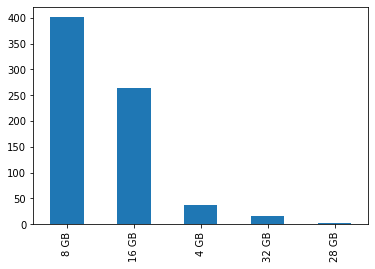

In [32]:
#checking unique values
df["RAM"].value_counts().plot(kind='bar')
plt.show()

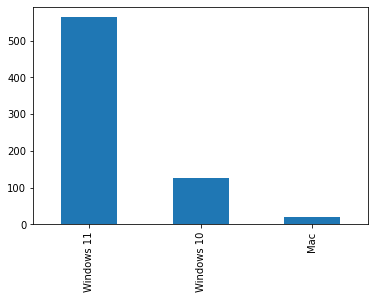

In [33]:
df["OS"].value_counts().plot(kind='bar')
plt.show()

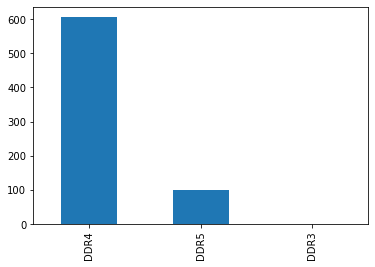

In [34]:
df["RAM_Type"].value_counts().plot(kind='bar')
plt.show()

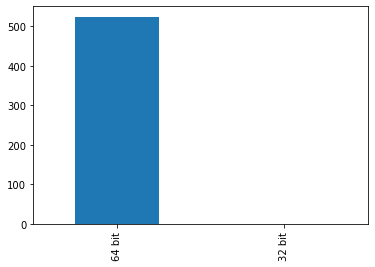

In [35]:
df["Bit"].value_counts().plot(kind='bar')
plt.show()

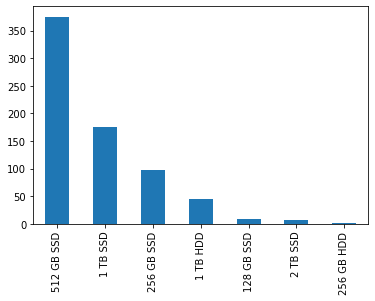

In [36]:
df["SSD"].value_counts().plot(kind='bar')
plt.show()

<AxesSubplot:>

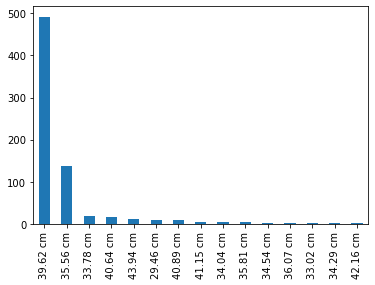

In [37]:
df["Display"].value_counts().plot(kind='bar')


In [38]:
## removing extra strings in columns

df["RAM"] = df["RAM"].str.strip("GB")


In [39]:
df["Bit"] = df["Bit"].str.strip("bit")

In [40]:
df["Display"] = df["Display"].str.strip("cm")

In [41]:
df["SSD"] = df["SSD"].str.strip("GB SSD & GB HDD & TB HDD & TB SDD")

In [42]:
df["Processor"] = df["Processor"].str.strip("Processor")

In [43]:
## checking nul values percentage

(df.isnull().sum()/len(df))*100

MRP           0.000000
OS            1.527778
Processor     0.000000
Display       0.972222
RAM           0.000000
RAM_Type      1.666667
Bit          27.083333
SSD           1.388889
dtype: float64

In [44]:
#filling cat values with mode()

df["OS"] = df["OS"].fillna(df["OS"].mode()[0])

In [45]:
df["Bit"] = df["Bit"].fillna(df["Bit"].mode()[0])

In [46]:
df["SSD"] = df["SSD"].fillna(df["SSD"].mode()[0])

In [47]:
df['RAM_Type'] = df["RAM_Type"].fillna(df["RAM_Type"].mode()[0])

In [48]:
#checking null values for cat columns
df.loc[:,['OS','Bit','SSD','RAM_Type']].isnull().any()


OS          False
Bit         False
SSD         False
RAM_Type    False
dtype: bool

In [49]:
#datatype of columns

df.dtypes

MRP          object
OS           object
Processor    object
Display      object
RAM          object
RAM_Type     object
Bit          object
SSD          object
dtype: object

In [50]:
#converting Diaplay,RAM to numeric


df["MRP"] = pd.to_numeric(df["MRP"], errors="coerce")


In [51]:
df["Display"] = pd.to_numeric(df["Display"], errors="coerce")

In [52]:
df.dtypes

MRP            int64
OS            object
Processor     object
Display      float64
RAM           object
RAM_Type      object
Bit           object
SSD           object
dtype: object

In [53]:
#Checking correlation blw numerical values with price
df["OS"][715]

'Windows 11'

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MRP        720 non-null    int64  
 1   OS         720 non-null    object 
 2   Processor  720 non-null    object 
 3   Display    713 non-null    float64
 4   RAM        720 non-null    object 
 5   RAM_Type   720 non-null    object 
 6   Bit        720 non-null    object 
 7   SSD        720 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 45.1+ KB


In [55]:
#correlation b/w numerical columns with target column
df.corr()['MRP']

MRP        1.000000
Display    0.259611
Name: MRP, dtype: float64

<AxesSubplot:>

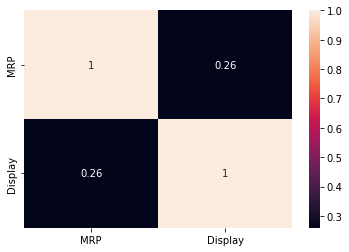

In [56]:
sns.heatmap(df.corr(), annot=True)

###### Here Display is negatively correlated to MRP

C:\Users\91932\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


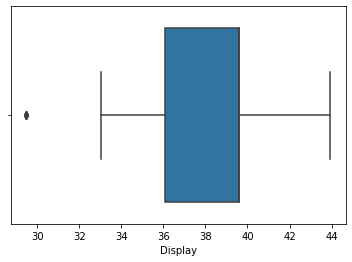

In [57]:
#checking display column nan value percentage
sns.boxplot(df["Display"])
plt.show()

In [58]:
def find_outliers(data, col, verbose=True):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3 - q1
    lower_boundary = q1 - (1.5*IQR)
    upper_boundary = q3 + (1.5*IQR)
    outliers_df = data[(data[col]<lower_boundary) | (data[col]>upper_boundary)]
  
    if(verbose):
        print("Lower Boundary :",lower_boundary, "Upper Boundary :",upper_boundary)
        display(outliers_df)
        print("Outliers Percentage ::", (len(outliers_df)/len(data)) * 100, "%")
        print(len(outliers_df))
    return outliers_df

In [59]:
outliers = find_outliers(df, "Display")

Lower Boundary : 30.745000000000005 Upper Boundary : 44.94499999999999


,MRP,OS,Processor,Display,RAM,RAM_Type,Bit,SSD
345,14990,Windows 11,Other Intel,29.46,4,DDR4,64,512
434,26490,Windows 10,Other Intel,29.46,4,DDR4,64,256
479,29980,Windows 11,Other Intel,29.46,4,DDR4,64,128
494,29980,Windows 11,Other Intel,29.46,4,DDR4,64,128
544,21990,Windows 11,Other Intel,29.46,4,DDR4,64,512
559,19990,Windows 11,Other Intel,29.46,4,DDR4,64,512
632,28490,Windows 11,Other Intel,29.46,4,DDR4,64,512
638,23250,Windows 11,Other Intel,29.46,4,DDR4,64,256
715,23490,Windows 11,Other Intel,29.46,4,DDR4,64,512


Outliers Percentage :: 1.25 %
9


In [60]:
df["Display"].fillna(df["Display"].median(), inplace=True)

In [61]:
#checking sum of nan values
df.isnull().sum()

MRP          0
OS           0
Processor    0
Display      0
RAM          0
RAM_Type     0
Bit          0
SSD          0
dtype: int64

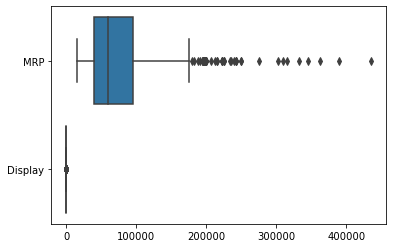

In [62]:
#check data visualization  between feature columns with MRP
#1.checking outliers in data

sns.boxplot(data=df, orient = 'h')
plt.show()

###### MRP contains many outtliers than Display 

In [63]:
#checking otliers percentage of MRP
outliers = find_outliers(df, "MRP")

Lower Boundary : -45368.125 Upper Boundary : 179604.875


,MRP,OS,Processor,Display,RAM,RAM_Type,Bit,SSD
15,196990,Windows 11,AMD,39.62,16,DDR5,64,1
27,196990,Windows 11,AMD,39.62,16,DDR5,64,1
41,194990,Windows 11,AMD,39.62,16,DDR5,64,1
56,196990,Windows 11,AMD,39.62,16,DDR5,64,1
70,194990,Windows 11,AMD,39.62,16,DDR5,64,1
...,...,...,...,...,...,...,...,...
689,199990,Windows 10,AMD,39.62,16,DDR4,64,512
694,179990,Windows 11,Intel Core i7,40.64,16,DDR5,64,1
701,196990,Windows 11,AMD,39.62,16,DDR5,64,1
712,233990,Windows 10,Intel Core i7,35.56,16,DDR3,64,2


Outliers Percentage :: 11.666666666666666 %
84


##### The outliers are 11% and it seems like they are going to contribute to the analysis. So, we are not going to treat them.

C:\Users\91932\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


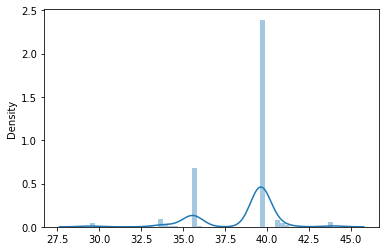

In [64]:
sns.distplot( x=df["Display"])
plt.show()

In [65]:
#BIvariate Analysis

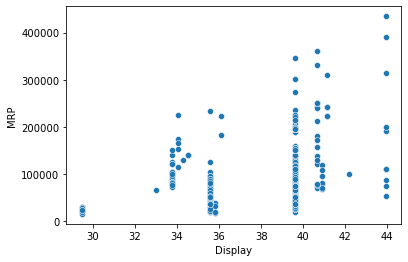

In [66]:
sns.scatterplot(x=df["Display"], y=df["MRP"])
plt.show()

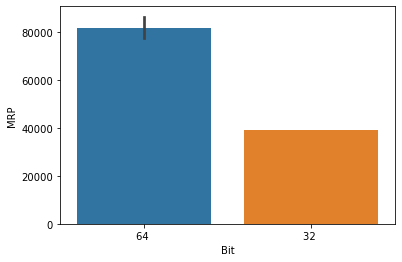

In [67]:
sns.barplot(x=df["Bit"], y=df["MRP"])
plt.show()

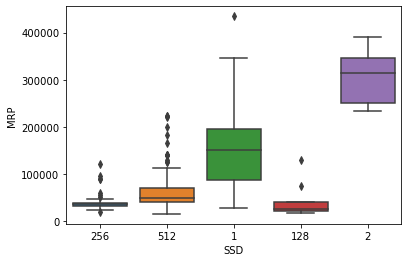

In [68]:
sns.boxplot(x=df["SSD"], y=df["MRP"])
plt.show()

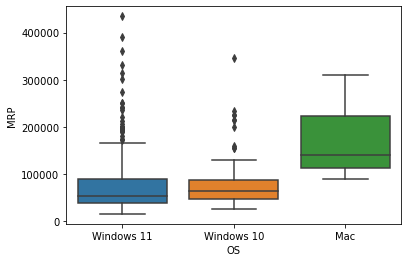

In [69]:
sns.boxplot(x=df["OS"], y=df["MRP"])
plt.show()

C:\Users\91932\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


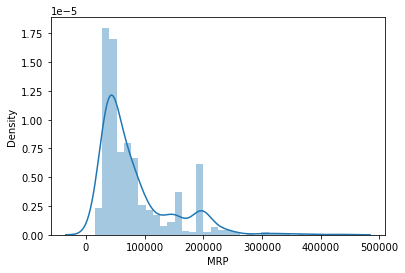

In [70]:
#converting target column to normalized

sns.distplot(df["MRP"])
plt.show()

In [71]:
df.to_csv("Laptop_price_prediction.csv", index = False)



In [72]:
#splitting train and test data

X = df.drop(columns="MRP")
y = df["MRP"]

In [73]:


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=5)

In [74]:
X_train

,OS,Processor,Display,RAM,RAM_Type,Bit,SSD
338,Windows 11,Intel Core i7,39.62,16,DDR5,64,512
611,Windows 11,AMD,39.62,16,DDR4,64,1
193,Windows 10,Other Intel,39.62,16,DDR4,64,1
575,Windows 10,AMD,39.62,4,DDR4,64,1
354,Windows 11,Intel Core i5,35.56,8,DDR4,64,512
...,...,...,...,...,...,...,...
73,Windows 11,AMD,39.62,8,DDR4,64,512
400,Windows 10,AMD,35.56,8,DDR4,64,512
118,Mac,AMD,33.78,16,DDR4,64,512
701,Windows 11,AMD,39.62,16,DDR5,64,1


In [75]:
X_train.shape

(576, 7)

In [76]:
#Linear 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error

In [77]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred)*100)
print('MAE',mean_absolute_error(y_test,y_pred)*100)

R2 score 86.55958667387135
MAE 1670060.1096943615


C:\Users\91932\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [78]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')

step2 = Ridge(10)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print('R2_score',r2_score(y_test,y_pred)*100)
print('MAE',mean_absolute_error(y_test,y_pred)*100)

C:\Users\91932\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2_score 84.98346901102354
MAE 1761802.5556092649


In [79]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop= 'first'),[0,1,4])
],remainder='passthrough')

step2 = Lasso(10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)

y_pred =pipe.predict(X_test)
print('R2_score',r2_score(y_test,y_pred)*100)
print('MAE',mean_absolute_error(y_test,y_pred)*100)

R2_score 86.5651521340824
MAE 1667443.6085684847


C:\Users\91932\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [80]:
#KNN
#from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop= 'first'),[0,1,4])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)

y_pred =pipe.predict(X_test)
print('R2_score',r2_score(y_test,y_pred)*100)
print('MAE',mean_absolute_error(y_test,y_pred)*100)

R2_score 86.00898466878373
MAE 1621158.611111111


C:\Users\91932\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [81]:
#DecisionTree

from sklearn.tree import DecisionTreeRegressor
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop= 'first'),[0,1,4])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)

y_pred =pipe.predict(X_test)
print('R2_score',r2_score(y_test,y_pred)*100)
print('MAE',mean_absolute_error(y_test,y_pred)*100)

C:\Users\91932\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2_score 85.83403230479863
MAE 1434137.493235748


In [82]:
#Random Forest 
from sklearn.ensemble import RandomForestRegressor
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred)*100)
print('MAE',mean_absolute_error(y_test,y_pred)*100)


C:\Users\91932\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 88.76167866858908
MAE 1429369.5201885926


###### Export Model

In [84]:
import joblib


joblib.dump(pipe,"prediction.pkl")

['prediction.pkl']

In [85]:
df

,MRP,OS,Processor,Display,RAM,RAM_Type,Bit,SSD
0,36990,Windows 11,Intel Core i3,35.56,8,DDR4,64,256
1,39990,Windows 11,Intel Core i3,39.62,8,DDR4,64,512
2,32990,Windows 11,Intel Core i3,39.62,8,DDR4,64,512
3,49990,Windows 10,AMD,39.62,8,DDR4,64,512
4,49990,Windows 11,Intel Core i5,39.62,8,DDR4,64,512
...,...,...,...,...,...,...,...,...
715,23490,Windows 11,Other Intel,29.46,4,DDR4,64,512
716,73490,Windows 11,AMD,39.62,8,DDR4,64,512
717,194990,Windows 11,AMD,39.62,16,DDR5,64,1
718,125990,Windows 11,Intel Core i7,35.56,16,DDR5,64,512


In [86]:
X_train


,OS,Processor,Display,RAM,RAM_Type,Bit,SSD
338,Windows 11,Intel Core i7,39.62,16,DDR5,64,512
611,Windows 11,AMD,39.62,16,DDR4,64,1
193,Windows 10,Other Intel,39.62,16,DDR4,64,1
575,Windows 10,AMD,39.62,4,DDR4,64,1
354,Windows 11,Intel Core i5,35.56,8,DDR4,64,512
...,...,...,...,...,...,...,...
73,Windows 11,AMD,39.62,8,DDR4,64,512
400,Windows 10,AMD,35.56,8,DDR4,64,512
118,Mac,AMD,33.78,16,DDR4,64,512
701,Windows 11,AMD,39.62,16,DDR5,64,1


In [87]:
X_train.iloc[0,:].values


array(['Windows 11', 'Intel Core i7', 39.62, '16 ', 'DDR5', '64 ', '512'],
      dtype=object)

In [88]:
new_pt = [['Windows 11', 'Intel Core i7', 39.62, '16 ', 'DDR5', '64 ', '512']]

columns = ["OS","Processor","Display","RAM","RAM_Type","Bit","SSD"]

new_pt = pd.DataFrame(new_pt, columns = X_test.columns)

new_pt

pipe.predict(new_pt)           



array([149165.54285714])

In [89]:
y_pred

array([114148.53892596,  40097.36246739,  50278.96217513,  41572.39516667,
        45479.19010795,  47867.96037413,  36961.11410373,  54627.89971429,
        67456.42285714,  29402.56666667,  80010.41166667,  40611.78      ,
        40097.36246739,  41572.39516667,  29030.43333333,  45479.19010795,
       130702.15175439,  45479.19010795,  68664.29144841,  73419.87231638,
        45479.19010795, 308406.19666667,  80010.41166667, 114148.53892596,
        35703.48888889,  45479.19010795,  45479.19010795, 188501.78479969,
       150349.02857143,  36961.11410373,  37987.52333333, 114148.53892596,
        36961.11410373,  75241.57964297,  46674.20289683,  35703.48888889,
        89514.54892063,  45479.19010795,  47867.96037413,  47646.0312485 ,
       130677.07333333,  45479.19010795,  73419.87231638, 139776.69166667,
       114148.53892596, 188501.78479969,  45479.19010795,  47867.96037413,
        47867.96037413,  57806.49126984,  77308.81365079, 188501.78479969,
        54627.89971429,  